Imports

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


4422102/4422102 [==============================] - 1s 0us/step


Exploração dos dados

In [ ]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

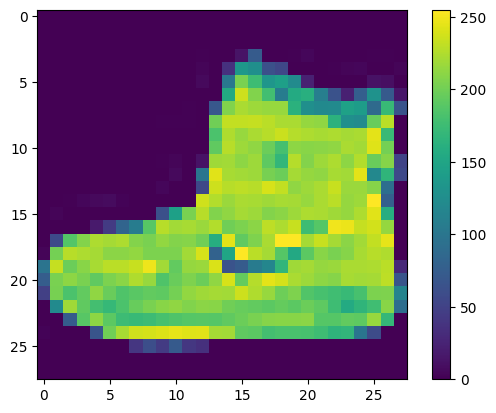

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [ ]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 19s 12ms/step - loss: 0.5265 - accuracy: 0.8131 - val_loss: 0.4059 - val_accuracy: 0.8540
Epoch 2/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3971 - accuracy: 0.8534 - val_loss: 0.3761 - val_accuracy: 0.8646
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3592 - accuracy: 0.8680 - val_loss: 0.3565 - val_accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3400 - accuracy: 0.8757 - val_loss: 0.3435 - val_accuracy: 0.8754
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3225 - accuracy: 0.8807 - val_loss: 0.3449 - val_accuracy: 0.8780


Sumário do modelo

In [ ]:
sumario_do_modelo = modelo.summary() # resumo do modelo
# shape é os neuronios
# param

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Pesos da primeira camada Dense

In [ ]:
# layers 1 que está a relu
pesos_camada_dense = modelo.layers[1].get_weights()[0]  # O indice 0 é peso
pesos_camada_dense

array([[-0.0183803 ,  0.04428471, -0.00828834, ..., -0.042724  ,
        -0.02423467,  0.0320338 ],
       [ 0.00620427, -0.03681601,  0.10154293, ..., -0.15277654,
         0.02990313, -0.08602713],
       [-0.10408315, -0.09877252,  0.05814307, ..., -0.17954595,
         0.01630278, -0.00665557],
       ...,
       [ 0.04799813,  0.14024037,  0.17907597, ...,  0.12112319,
        -0.1555333 ,  0.03176869],
       [ 0.03496617,  0.22040136, -0.05248668, ...,  0.17125091,
        -0.24469042,  0.08383816],
       [-0.01922606, -0.02082573, -0.13983722, ...,  0.10676289,
        -0.16184743,  0.02583428]], dtype=float32)

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]  # Já o indice 1 é vies
vieses_camada_dense

array([ 0.23001143, -0.13345985,  0.24146785,  0.05455736,  0.33469442,
        0.07340584,  0.32677504,  0.12692998, -0.12175679, -0.00596205,
        0.14068204, -0.00496011, -0.03986838,  0.33312234,  0.20516399,
        0.01589819,  0.10212081,  0.32688257, -0.02584258,  0.04437001,
        0.10634553, -0.00091231, -0.03257511, -0.01189505,  0.16073152,
        0.2865975 , -0.16138542,  0.10242789, -0.0324237 ,  0.08857159,
       -0.02804509,  0.13756615,  0.19041319,  0.35751244, -0.4476287 ,
       -0.05465605, -0.29653803, -0.01891401,  0.14755698,  0.2629585 ,
        0.3549502 , -0.04007593,  0.38176107,  0.08922181,  0.00111577,
        0.1738131 ,  0.06959354,  0.24305117, -0.16449444, -0.03834238,
       -0.03008991,  0.28109398,  0.35738268,  0.03620624, -0.148031  ,
        0.3146934 , -0.03226052,  0.04625665,  0.15281759,  0.32869318,
        0.12881514, -0.08462764, -0.01678711,  0.03285253, -0.01338832,
        0.01683603, -0.1576756 ,  0.4561404 , -0.00773217, -0.04

In [ ]:
historico.history

{'loss': [0.5264846086502075,
  0.39706557989120483,
  0.3591969907283783,
  0.3400360941886902,
  0.32246601581573486],
 'accuracy': [0.8130833506584167,
  0.8534166812896729,
  0.8679791688919067,
  0.8756666779518127,
  0.8807083368301392],
 'val_loss': [0.40585893392562866,
  0.37608781456947327,
  0.35652852058410645,
  0.343514084815979,
  0.3449447751045227],
 'val_accuracy': [0.8539999723434448,
  0.8645833134651184,
  0.8715000152587891,
  0.8754166960716248,
  0.878000020980835]}

Salvando e carregando o modelo treinado

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualizando as acurácias de treino e validação por época

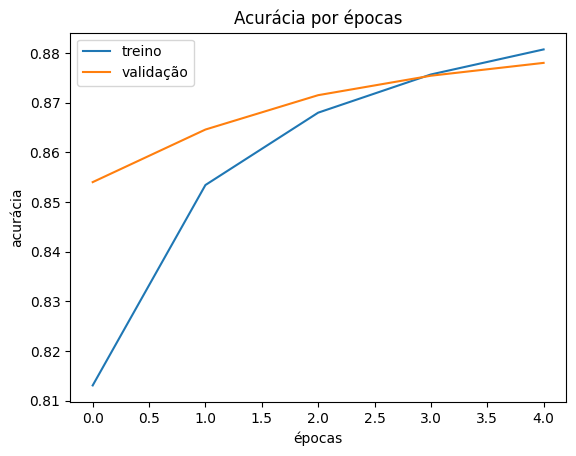

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

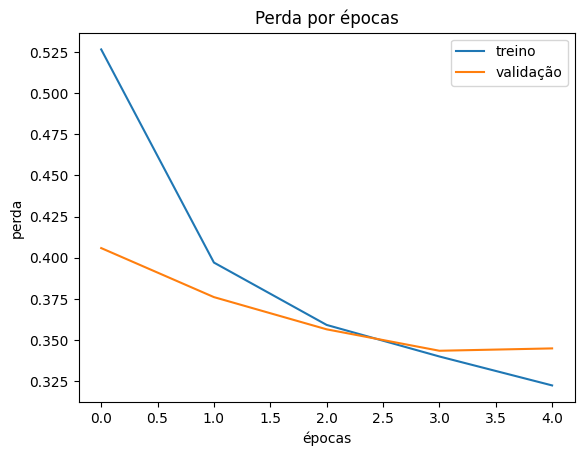

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 60.5026 - accuracy: 0.8509
Perda do teste: 60.50261306762695
Acurácia do teste: 0.8508999943733215
